## Iris Flower Classification

-------------

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [138]:
df= pd.read_csv(r"C:\Users\Prem\Downloads\IRIS dataset.csv")

In [139]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
df.shape

(150, 5)

In [141]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Exploratory Data Analysis

In [142]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [145]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [146]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [147]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [148]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Data Visualization

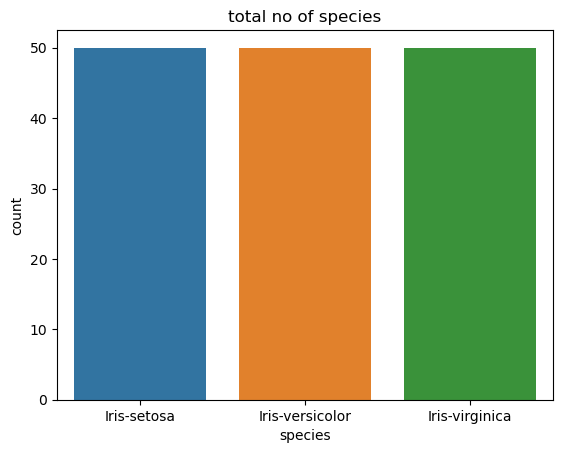

In [149]:
sns.countplot(df['species'])
plt.title('total no of species')
plt.show()

In [150]:
num_cols=df.select_dtypes('float').columns
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

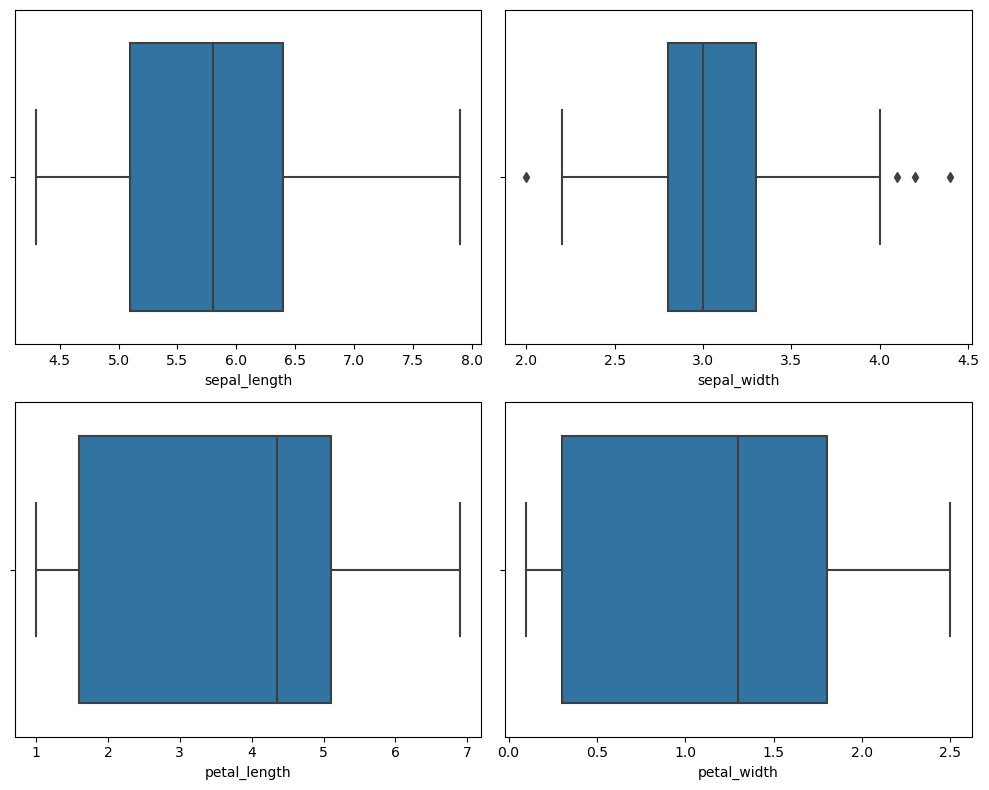

In [151]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

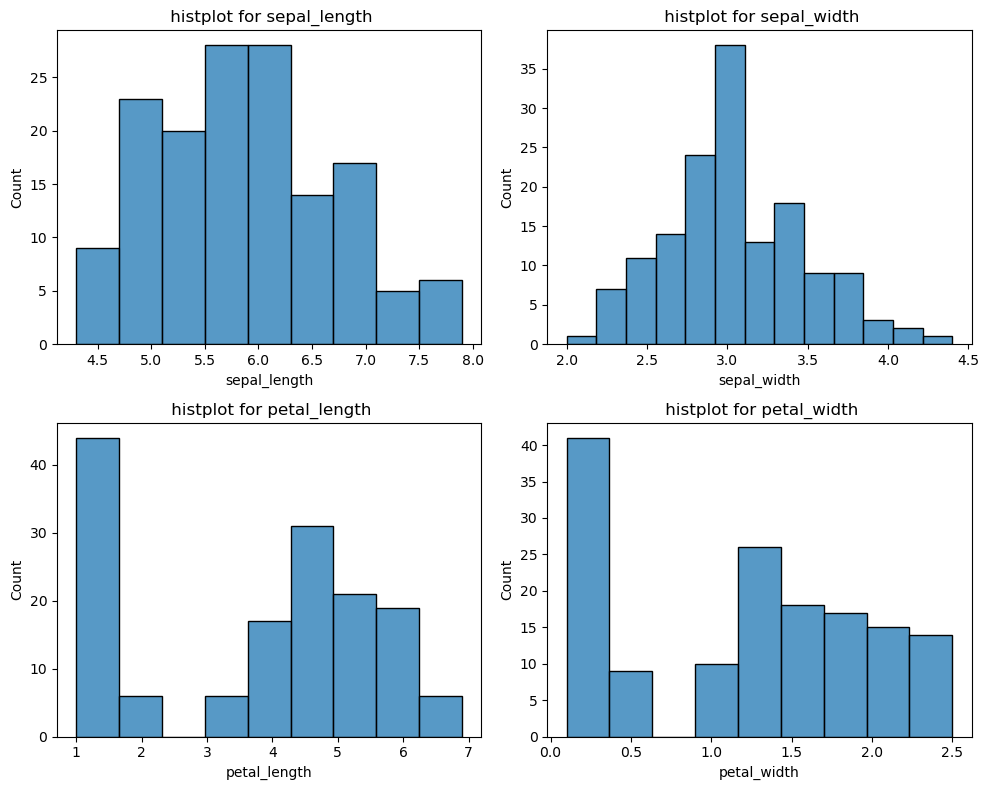

In [152]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.histplot(df[i])
    plt.title(f" histplot for {i}")
    t+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

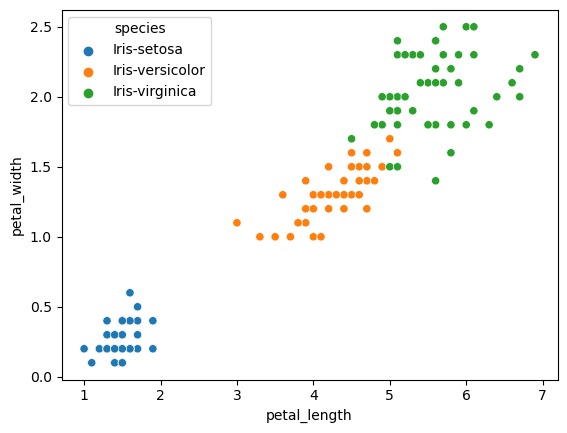

In [153]:
sns.scatterplot(df.petal_length, df.petal_width, hue=df.species)

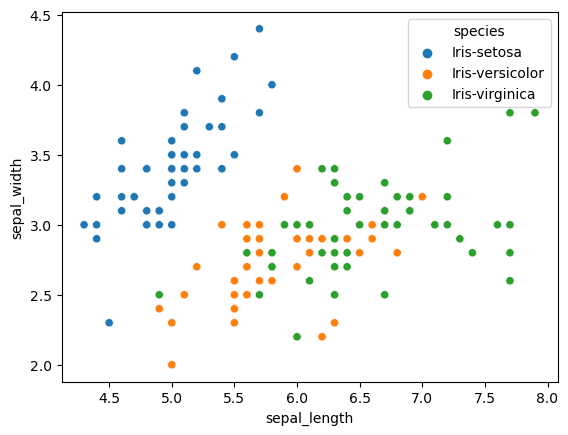

In [154]:
sns.scatterplot(df.sepal_length, df.sepal_width, hue=df.species)
plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

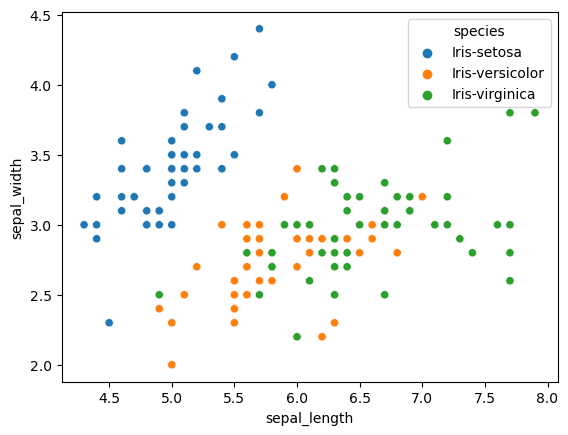

In [155]:
sns.scatterplot(df.sepal_length, df.sepal_width, hue= df.species)

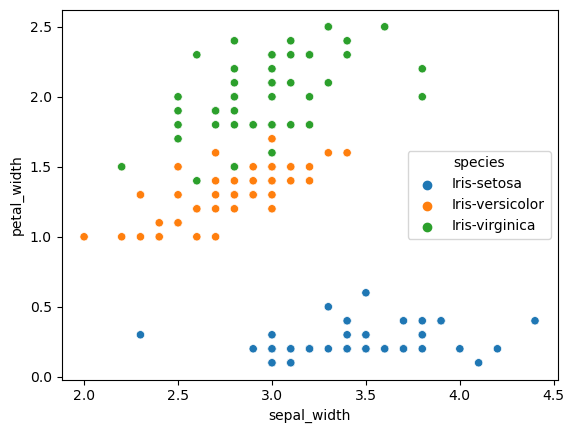

In [156]:
sns.scatterplot(df.sepal_width, df.petal_width, hue=df.species)
plt.show()

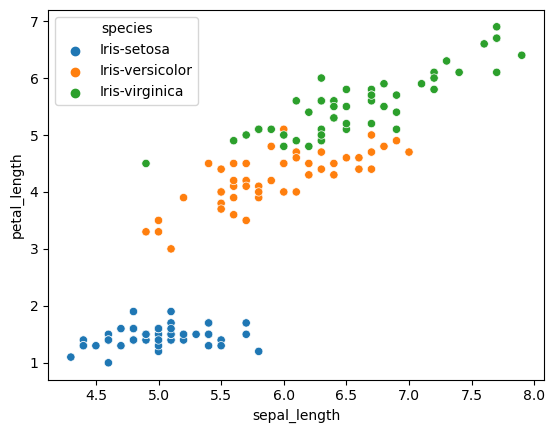

In [157]:
sns.scatterplot(df.sepal_length,df.petal_length, hue=df.species)
plt.show()

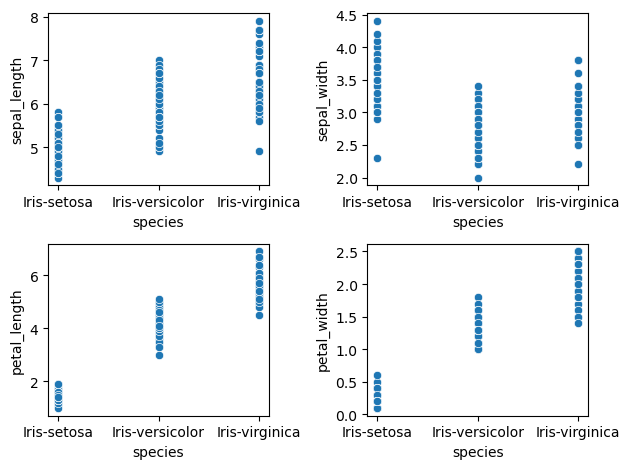

In [158]:
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.scatterplot(df.species, df[i])
    t+=1
plt.tight_layout()

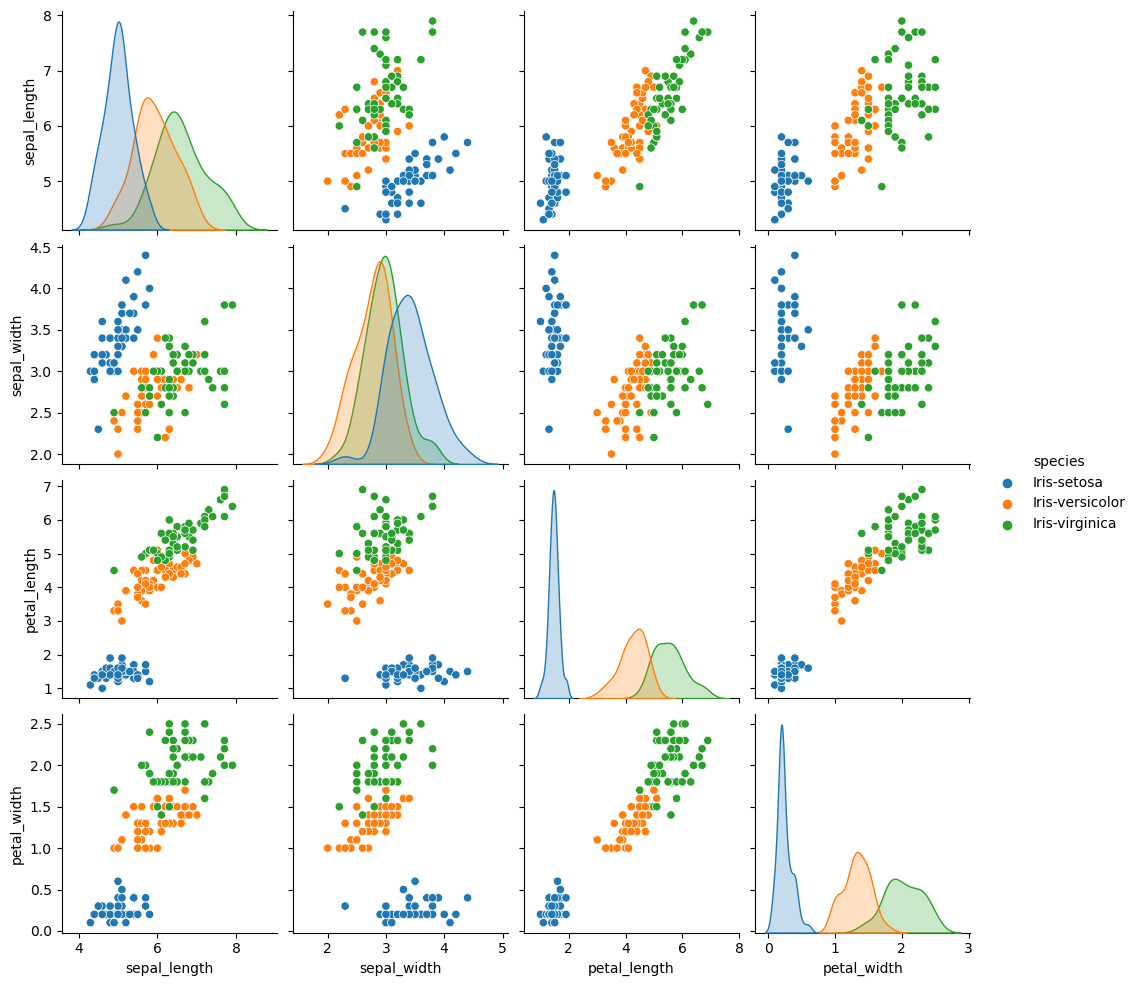

In [159]:
sns.pairplot(data=df, hue='species')
plt.show()

In [160]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

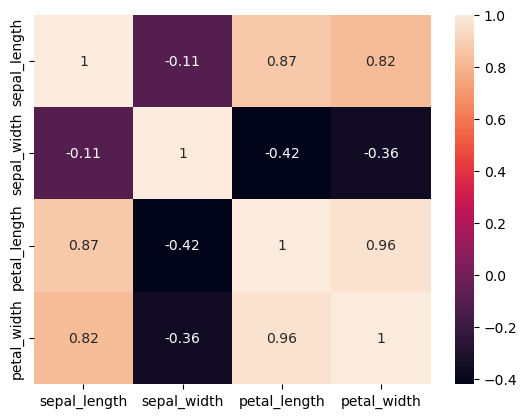

In [161]:
sns.heatmap(df.corr(), annot=True)

### Transforming the dataset

In [162]:
le= LabelEncoder()

In [163]:
df['species']= le.fit_transform(df['species'])

In [164]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [165]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [174]:
x= df.drop(['species'],axis=1)
y= df['species']

In [175]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

### Spliting the dataset

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [178]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [179]:
y_train.shape, y_test.shape

((120,), (30,))

### Model building

In [181]:
lr= LinearRegression()

In [182]:
lr.fit(x_train,y_train)

LinearRegression()

In [183]:
lr_pred= lr.predict(x_test)

In [184]:
lr_pred

array([-0.03095888,  1.15193729,  1.11476089,  1.52830702,  0.93403669,
        1.14767414,  2.03794565,  0.06010669,  1.7226656 , -0.10564754,
        1.73865257,  1.24724732,  1.44109596, -0.10111589, -0.08785677,
        1.93208019, -0.12158876,  1.15505509,  2.05140593,  0.8686381 ,
        1.195785  ,  1.63522488,  1.71125604, -0.04756256,  1.38561193,
        0.89530483,  0.85842253, -0.09901798,  1.98500213,  1.41101041])

In [188]:
r2_score(y_test, lr_pred)

0.9093181196512126

In [189]:
mean_absolute_error(y_test, lr_pred)

0.1826527113953301

In [191]:
mean_squared_error(y_test, lr_pred)

0.05652503875074418

In [192]:
logreg= LogisticRegression()

In [194]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [195]:
log_pred= logreg.predict(x_test)

In [197]:
log_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [199]:
report=classification_report(y_test, log_pred)

In [200]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [201]:
rf= RandomForestRegressor()

In [203]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [204]:
rf_pred= rf.predict(x_test)

In [205]:
rf_pred

array([0.  , 1.  , 1.  , 1.56, 1.  , 1.  , 2.  , 0.  , 1.99, 0.  , 2.  ,
       1.05, 1.07, 0.  , 0.  , 2.  , 0.  , 1.  , 1.97, 1.14, 1.  , 1.93,
       2.  , 0.  , 1.06, 1.  , 1.02, 0.  , 2.  , 1.05])

In [207]:
r2_score(y_test, rf_pred)

0.8934224598930481

In [208]:
mean_absolute_error(y_test, rf_pred)

0.09000000000000001

In [209]:
mean_squared_error(y_test, rf_pred)

0.06643333333333333